<center>
    <img src="https://media-exp1.licdn.com/dms/image/C4E1BAQErMN84hgIX3Q/company-background_10000/0/1622546957980?e=2147483647&v=beta&t=l7tU8QXWhNOtm4NZ3ZLXRSw42o0U-QZu-3JbvBr94Fc" width="1000" alt="cognitiveclass.ai logo"  />
</center>

Visit 3 APIs from the [public-apis](https://github.com/public-apis/public-apis) github page.<br>
Make sure they have different style of documentation.
Create dataframes and a small analysis of your dataset including Seaborn graphs.

In [55]:
# Dependencies
import requests

from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## API 1

In [56]:
poke_api = requests.get('https://pokeapi.co/api/v2/pokemon/ditto')

In [57]:
data1 = poke_api.json()
data1.keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [58]:
names = []
game_indexes = []

for i in range(19):
    names.append(data1['game_indices'][i]['version']['name'])
    game_indexes.append(data1['game_indices'][i]['game_index'])
    
table = pd.DataFrame({'Name':names,'Game index':game_indexes})

Text(0.5, 1.0, 'Most occuring game index')

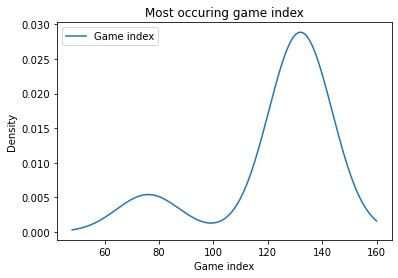

In [77]:
table.plot(kind = 'kde')
plt.xlabel('Game index')
plt.title('Most occuring game index')

## API 2

In [60]:
isro_api = requests.get('https://isro.vercel.app/api/customer_satellites').json()

In [61]:
mass = []
country = []
date = []

for j in range(len(isro_api['customer_satellites'])-1):
    country.append(isro_api['customer_satellites'][j]['country'])
    mass.append(isro_api['customer_satellites'][j]['mass'])
    date.append(pd.to_datetime(isro_api['customer_satellites'][j]['launch_date'], format = "%d-%m-%Y"))

In [62]:
table2 = pd.DataFrame({'mass': mass, 'Date': date, 'country': country})
table2['mass'] = table2['mass'].astype('float')

Text(0.5, 1.0, 'Masses of spacecrafts lauched by date')

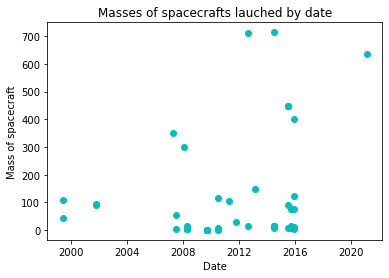

In [78]:
plt.plot(table2['Date'], table2['mass'], 'oc')
plt.ylabel('Mass of spacecraft')
plt.xlabel('Date')
plt.title('Masses of spacecrafts lauched by date')

## API 3

In [64]:
currency_api = requests.get('http://api.nbp.pl/api/exchangerates/tables/A/')

In [65]:
currency = currency_api.json()

In [70]:
mid = []
code = []
for k in range(len(currency[0]['rates'])-1):
    mid.append(currency[0]['rates'][k]['mid'])
    code.append(currency[0]['rates'][k]['code'])
    

In [71]:
table3 = pd.DataFrame({'Code':code, 'Mid': mid})

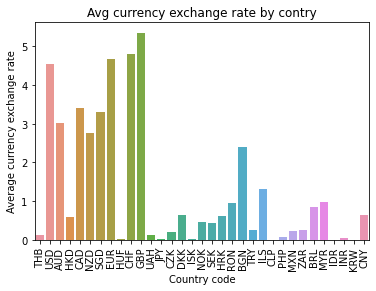

In [79]:
sns.barplot(x = table3['Code'], y = table3['Mid'])
plt.xlabel('Country code')
plt.ylabel('Average currency exchange rate')
plt.xticks(rotation=90)
plt.title('Avg currency exchange rate by contry')
plt.show()